In [1]:
#some code from Exploring_PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

tqdm.pandas()

%matplotlib inline

SEED = 42

NUM_FEATURES = 5000
NUM_CLASSES = 3993

features = pd.read_csv("../data/expanded/train_features.csv", names=range(NUM_FEATURES))
labels = pd.read_csv("../data/expanded/train_labels.csv", names=range(NUM_CLASSES))

/Applications/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


All code in this part is taken from Exploring_PCA. Instead of 2500 components(which we know is enough), just tried 5000 components for conclusiveness sake. Takes a few minutes to run, just so we have a graph for every feature rather than half of the feature(maybe for the report?)

In [9]:
scaler = StandardScaler(with_std=False)
features_centered = scaler.fit_transform(features)

n_components = len(features.columns)
#use all features
pca = PCA(n_components=n_components)
features_reduced = pca.fit_transform(features_centered)
features_reduced = pd.DataFrame(features_reduced)

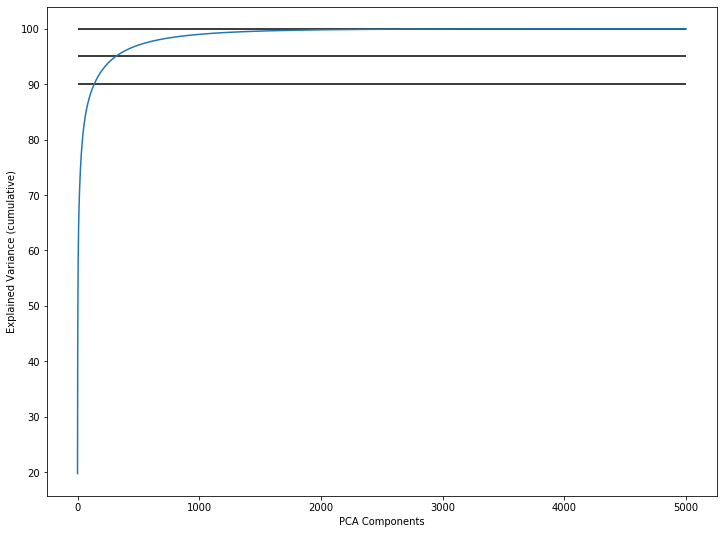

In [10]:
plt.figure(figsize=(12, 9))
plt.plot(pca.explained_variance_ratio_.cumsum() * 100)
plt.hlines([90, 95, 100], 0, n_components)
plt.xlabel("PCA Components")
plt.ylabel("Explained Variance (cumulative)")
plt.show()

In [11]:
5000 - (pca.explained_variance_ratio_.cumsum()*100 >= 90).sum()

137

We see that we only need 137 features to explain 90 percent of data variance, so reduce dimensionality to only 137 features, and then try a a baseline classifier.

In [13]:
scaler = StandardScaler(with_std=False)
features_centered = scaler.fit_transform(features)

n_components = 137
reduced_pca = PCA(n_components = n_components)
reduced_df = reduced_pca.fit_transform(features_centered)

In [14]:
reduced_df  = pd.DataFrame(reduced_df)

In [15]:
reduced_df.shape

(12409, 137)

Save reduced features in case need to work on it later in a different file.

In [16]:
reduced_df.to_csv(f"../data/expanded/reduced_features.csv", index=False, header=False)

## Model Training

Tried Baseline Model OvR classifier with logistic to see if there is equal performance with reduced time, however this time with a 70-30 train-test-split. Used SEED for the random seed.This code was written before the permananent validation set, so we just do this hypothetically

In [2]:
reduced_df = pd.read_csv(f"../data/expanded/reduced_features.csv", names=range(181))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import time

In [18]:
X_train, X_test, y_train, y_test = train_test_split(reduced_df, labels, test_size = 0.3, random_state = SEED)

In [19]:
from warnings import filterwarnings
filterwarnings('ignore')
start_time = time.time()
model = OneVsRestClassifier(LogisticRegression(random_state=SEED, n_jobs = -1)).fit(X_train,y_train)
end_time = time.time()

Remove convergance warnings(from Eelis's example, we know that it will not converge anyways)

ran overnight

In [22]:
model

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto', n_jobs=-1,
                                                 penalty='l2', random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [45]:
label_pred = model.predict(X_test.iloc[0,:].values.reshape(1, -1))

In [36]:
np.nonzero(label_pred)[1]

array([   0,    1,   15,   17,   18,   38,   41,   44,   45,   58,   59,
         63,   67,   78,   81,   82,   85,   94,   98,   99,  108,  112,
        118,  121,  122,  128,  135,  136,  138,  139,  141,  142,  150,
        155,  156,  158,  161,  162,  163,  165,  170,  171,  176,  182,
        183,  188,  194,  206,  207,  208,  210,  211,  215,  217,  222,
        223,  228,  229,  237,  241,  245,  249,  250,  251,  256,  260,
        265,  272,  273,  280,  292,  296,  299,  303,  306,  307,  309,
        313,  314,  315,  319,  320,  334,  337,  339,  340,  343,  344,
        346,  347,  349,  350,  356,  358,  360,  364,  367,  370,  374,
        376,  377,  381,  394,  395,  396,  397,  399,  400,  407,  408,
        414,  420,  422,  427,  436,  437,  440,  442,  443,  444,  447,
        450,  455,  457,  458,  460,  470,  471,  472,  476,  477,  485,
        486,  487,  491,  497,  499,  510,  520,  521,  522,  526,  530,
        535,  547,  554,  555,  558,  560,  563,  5

In [35]:
np.nonzero(y_test.iloc[0,:].values.reshape(1, -1))

(array([0, 0, 0, 0, 0, 0]), array([ 115,  617,  678,  731, 1019, 1055]))

In [42]:
label = []
for x in np.nonzero(label_pred)[1]:
    if x in np.nonzero(y_test.iloc[0,:].values.reshape(1, -1))[1]:
        label.append(x)

In [43]:
label

[617, 678, 731, 1019, 1055]

In [48]:
np.nonzero(model.predict(X_test.iloc[1,:].values.reshape(1, -1)))

(array([], dtype=int64), array([], dtype=int64))

In [49]:
np.nonzero(model.predict(X_test.iloc[2,:].values.reshape(1, -1)))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 232,  300,  490,  496,  509,  813, 1322, 1993, 2237, 3670]))

In [53]:
np.nonzero(y_test.iloc[2,:].values.reshape(1, -1))[1]

array([1308, 1337, 1338, 1352, 1566, 1579, 1580])

In [69]:
label_list= []
for i in range(100):
    if(np.nonzero(model.predict(X_test.iloc[i,:].values.reshape(1, -1)))[1] != []):
        label_list.append(True)

In [70]:
sum(label_list)

43

Conclusions made: Need more than 90 percent of variance. Although this could also be an effect of Logistic being a little too simple, we only have predictions for 43 instances in the validation set out of 100 instances, which can also not be correct. 

-Need to find a way to filter down predictions

-possibly explore more variance, or same variance with stronger model

In [1]:
from sklearn.metrics import label_ranking_average_precision_score 
import numpy as np 

In [2]:
y_true = np.array([[1, 0, 0],  
                   [1, 0, 1],  
                   [1, 1, 0]]) 
y_score = np.array([[0.75, 0.5, 1],  
                    [1, 0.2, 0.1], 
                    [0.9, 0.7, 0.6]]) 

In [3]:
print(label_ranking_average_precision_score( 
    y_true, y_score)) 

0.7777777777777777


In [6]:
y_true = np.array([[1, 0, 0,0],  
                   [1, 0, 1,0],  
                   [1, 1, 0,0]]) 
y_score = np.array([[0.75, 0.5, 1,0],  
                    [1, 0.2, 0.1,1], 
                    [0.9, 0.7, 0.6,0]]) 

In [7]:
print(label_ranking_average_precision_score( 
    y_true, y_score)) 

0.6666666666666666
